# Intoduction to image processing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from skimage.color import rgb2gray
from skimage import io, data, transform

plt.rcParams['font.size'] = 18

## Preparation of synthetic data

In [105]:
# Domain of a function
x = np.linspace(0, 2*np.pi, 500)

In [106]:
print(x.shape)
print(x[499])

(500,)
6.283185307179586


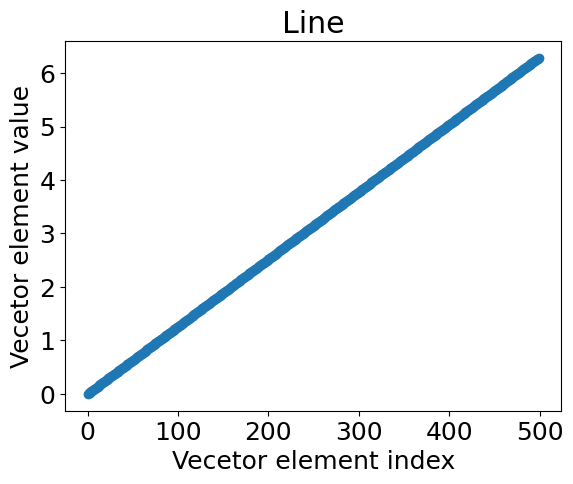

In [34]:
plt.title('Line')
plt.xlabel('Vecetor element index')
plt.ylabel('Vecetor element value')
plt.plot(x, "-o")

In [35]:
# Range of a function
y = np.sin(x)

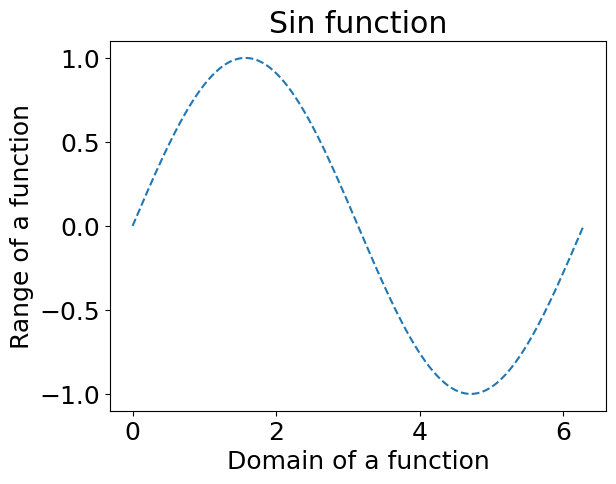

In [38]:
plt.figure()
plt.title('Sin function')
plt.xlabel('Domain of a function')
plt.ylabel('Range of a function')
plt.plot(x, y,'--')

## Generate random numbers
Create an array of the given shape and populate it with random samples from a uniform distribution over [0, 1)

### 1D

In [115]:
np.random.rand(10)

array([0.71495718, 0.48703406, 0.19567127, 0.40524221, 0.28210864,
       0.29948198, 0.67663076, 0.27381152, 0.1212568 , 0.9132545 ])

### 2D (Random noise)

In [116]:
random_numbers_matrix = np.random.rand(128,256)
random_numbers_matrix.shape

(128, 256)

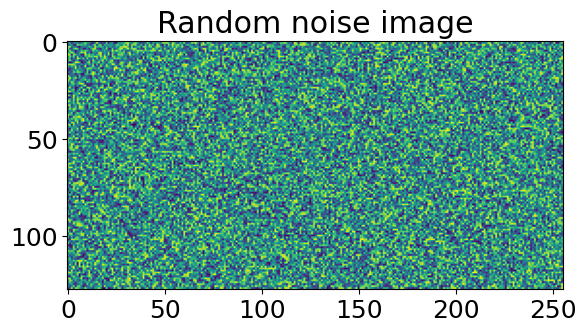

In [54]:
# Its possible to print ndarray (2D) as image.
plt.figure()
plt.title('Random noise image')
plt.imshow(random_numbers_matrix)

## Image operations

### Load image

In [133]:
# Its possible to use predefined images from library skimage.
from skimage import data
image_01 = data.astronaut()

In [134]:
print(image_01.shape)
print(type(image_01))

(512, 512, 3)
<class 'numpy.ndarray'>


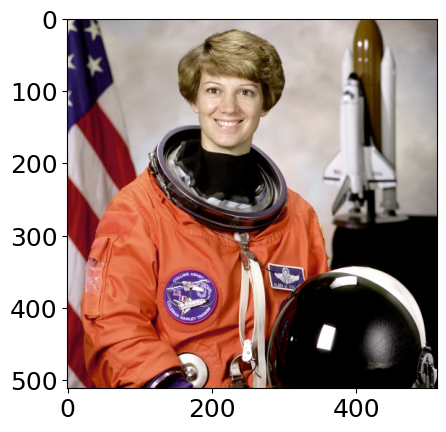

In [135]:
plt.imshow(image_01)

In [145]:
# Its possible to use predefined images from library skimage.
from skimage import io
image_02 = io.imread("../_data/muffin.png")
# image_02 = io.imread("https://picsum.photos/536/354")

In [146]:
print(image_02.shape)
print(type(image_02))

(468, 480, 4)
<class 'numpy.ndarray'>


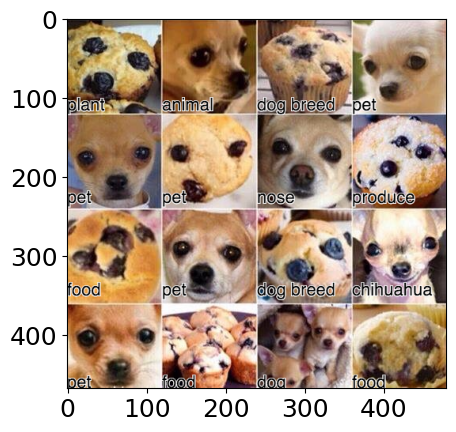

In [147]:
plt.imshow(image_02)

## RGB to GrayScale image

In [148]:
image_01_gray = (rgb2gray(image_01) * 255).astype(dtype=np.uint8)
print(image_01_gray.shape)

(512, 512)


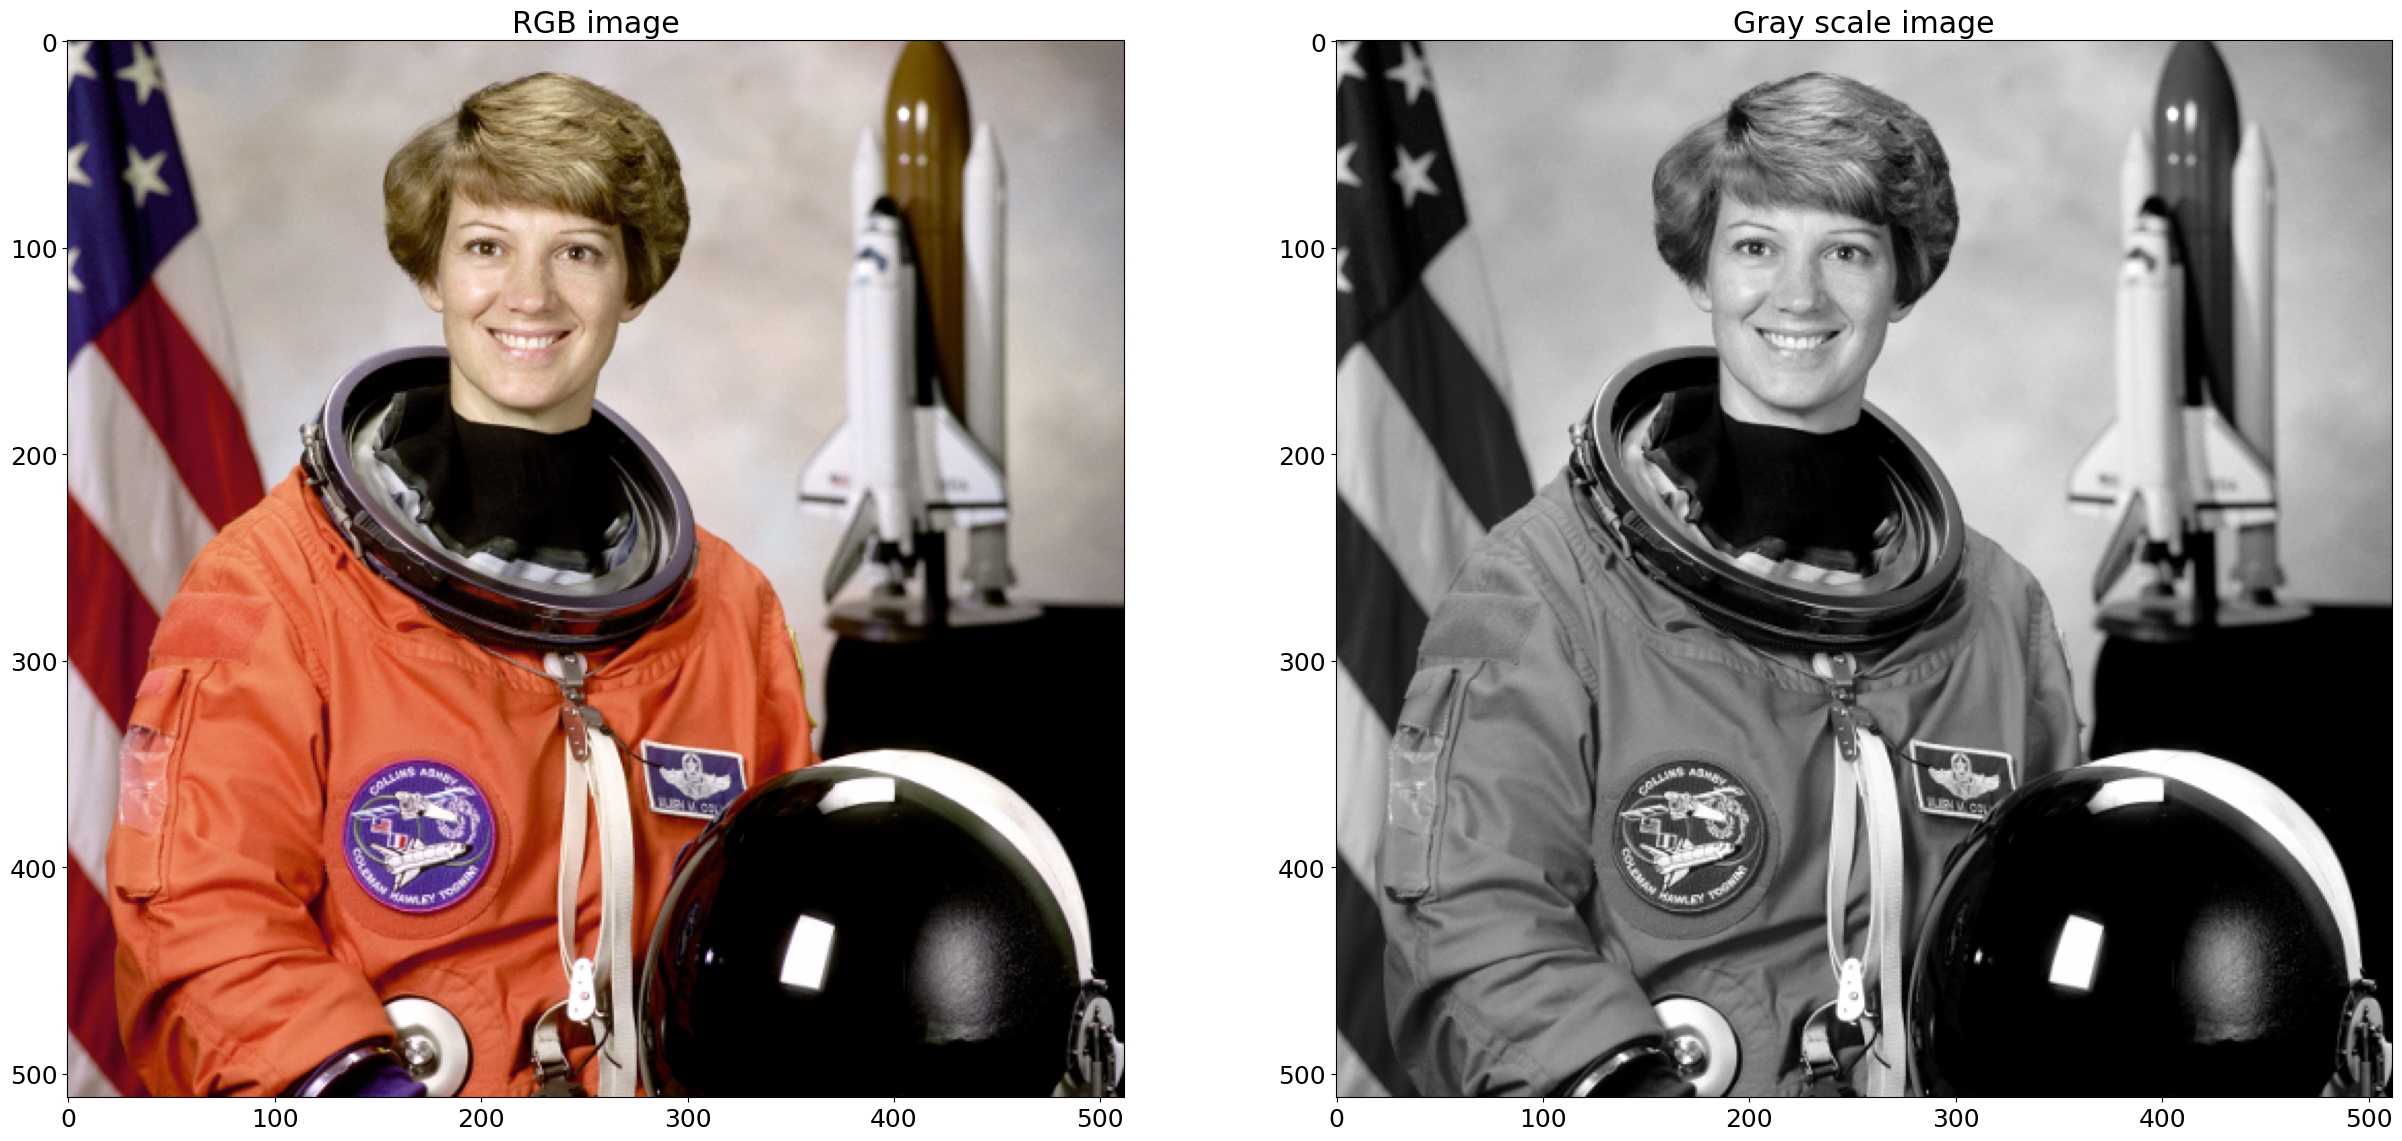

In [151]:
plt.figure(figsize= (30, 30))

plt.subplot(121)
plt.title('RGB image')
plt.imshow(image_01)

plt.subplot(122)
plt.title('Gray scale image')
# plt.imshow(image_01_gray)
plt.imshow(image_01_gray, cmap='gray')

<Figure size 640x480 with 0 Axes>

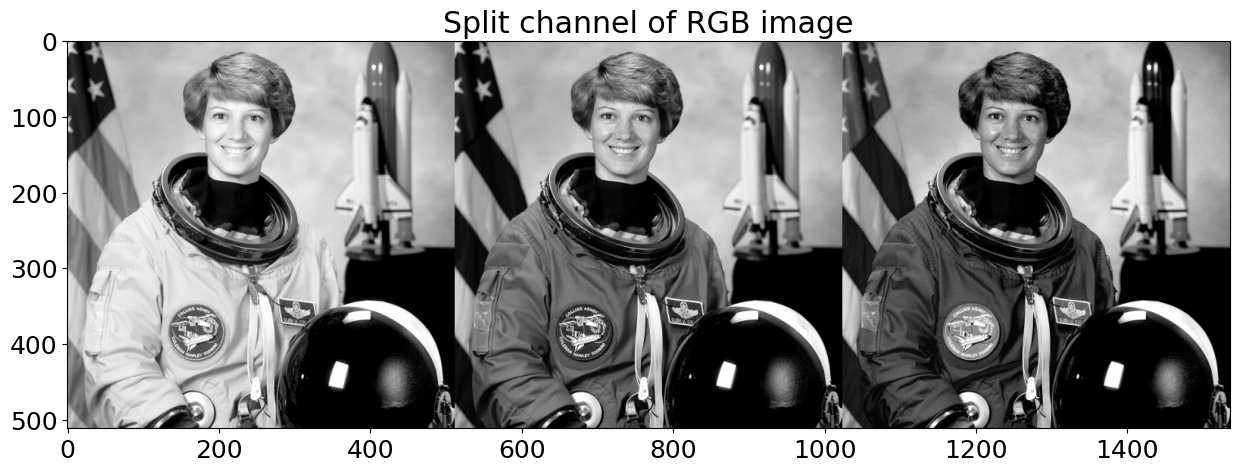

In [152]:
plt.figure()
plt.figure(figsize= (15, 60))
plt.title('Split channel of RGB image')
plt.imshow(np.concatenate((image_01[:, :, 0], image_01[:, :, 1], image_01[:, :, 2]), 1),cmap='gray')

### Manual RGB to GrayScale converiosn

Converting an RGB image to grayscale is not difficult. One possible approach is described below. Note that the individual color channels do not contribute equally to the result because the eye is not equally sensitive to each color component. Simply averaging the channels would result in a bland image. You may also notice that the result is not identical to the result of the function rgb2gray. rgb2gray uses a slightly different set of constants (0.2989R + 0.5870G + 0.1140*B).

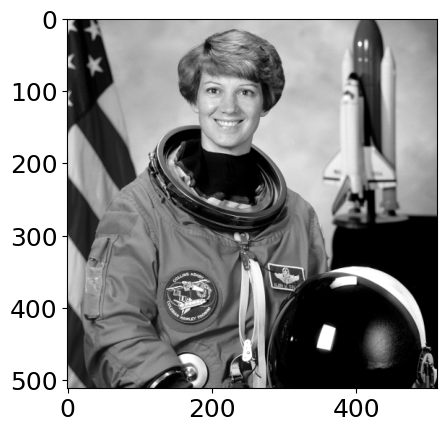

In [97]:
image_01_gray_manual = 0.2126 * image_01[:,:,0] + 0.7152 * image_01[:,:,1] + 0.0722 * image_01[:,:,2]
image_01_gray_manual = image_01_gray_manual.astype(dtype= np.uint8)
plt.figure()
plt.imshow(image_01_gray_manual, cmap= 'gray')

### Image comparsion

Error count: 1009
Mean square error:  0.003849029541015625


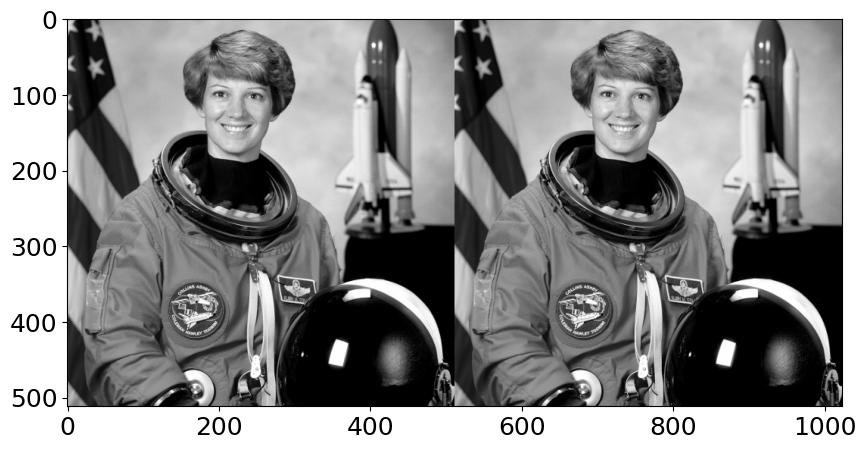

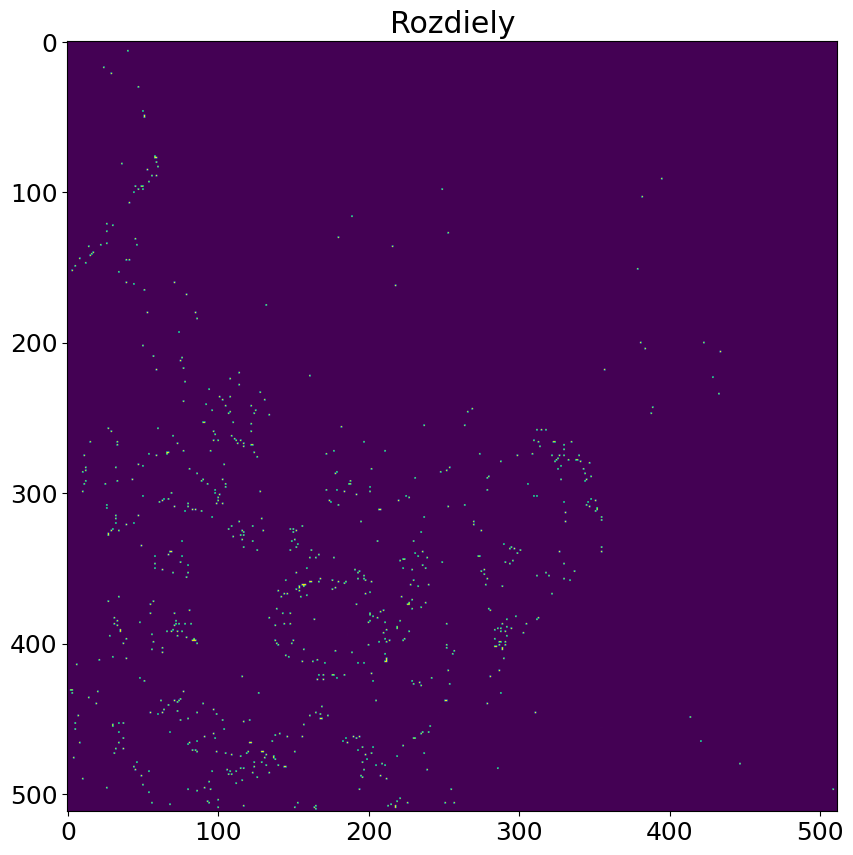

In [153]:
print("Error count:", np.sum((image_01_gray - image_01_gray_manual) ** 2))
print("Mean square error: ", np.sum((image_01_gray - image_01_gray_manual)**2 / image_01_gray_manual.size))

plt.figure(figsize= (10, 10))
plt.imshow(np.concatenate((image_01_gray, image_01_gray_manual), 1), cmap= 'gray')

plt.figure(figsize= (10, 10))
plt.title('Rozdiely')
plt.imshow(image_01_gray - image_01_gray_manual);

## Image manipulation

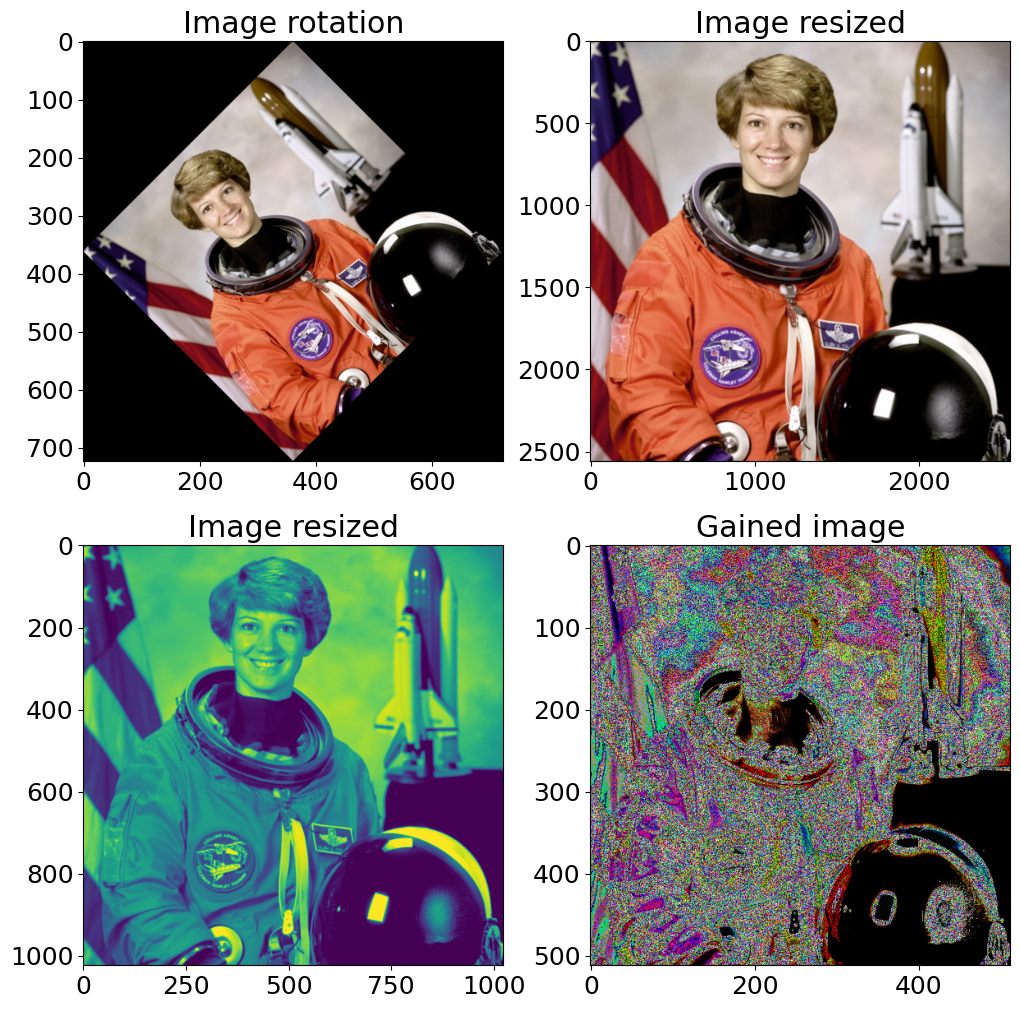

In [166]:
iRotated = transform.rotate(image_01, 45, resize=True)
iResized = transform.resize(image_01, (np.array(image_01.shape)[0] * 5, np.array(image_01.shape)[1] *5), order= 1)
iResized2 = transform.rescale(image_01_gray, 2)


plt.figure(figsize= (12, 12))

plt.subplot(221)
plt.title('Image rotation')
plt.imshow(iRotated)

plt.subplot(222)
plt.title('Image resized')
plt.imshow(iResized)

plt.subplot(223)
plt.title('Image resized')
plt.imshow(iResized2)

plt.subplot(224)
plt.title('Gained image')
plt.imshow(image_01**2);